# Computer Vision - Assignment 2

## Importing necessary libraries

In [30]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import math
import os
import pandas as pd

## Cloning image files

In [31]:
!git clone https://github.com/ummadiviany/computer-vision/

fatal: destination path 'computer-vision' already exists and is not an empty directory.


## Reading and displaying an image

In [32]:
im = Image.open('computer-vision/CA2/10images/2.tiff')

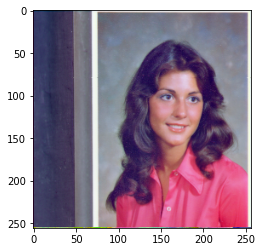

In [33]:
plt.imshow(im)

## RGB2HSI Function

In [35]:
def rgb2hsi(na):
    with np.errstate(divide='ignore', invalid='ignore'):
        #na = np.array(im,dtype='float32')
        na = na/255
        r,g,b = na[:,:,0], na[:,:,1], na[:,:,2]
        I = (r+g+b)/3
        S = 1 - np.minimum(np.minimum(r,g),b)/I
        H = np.zeros(np.shape(r))
        rc = np.shape(r)
        for i in range(rc[0]):
            for j in range(rc[1]):
                if not (r[i,j]==g[i,j] and g[i,j]==b[i,j]):
                    #print("r,g,b",r[i,j], g[i,j], b[i,j])
                    num = 0.5*(r[i,j]-g[i,j]+r[i,j]-b[i,j])
                    den = (r[i,j]-g[i,j])**2 + (r[i,j]-g[i,j])*(g[i,j]-b[i,j])
                    den = np.clip(den,1e-5,1)
                    den = np.sqrt(den)
                    #print("num,den",num,den)
                    x = num/den
                    #print("x",x)
                    theta = math.acos(np.clip(x,1e-5,1))
                    #theta = np.rad2deg(theta)
                    #print("theta",theta)
                    if b[i,j] > g[i,j]:
                        theta = 2*math.pi - theta

                    H[i,j] = np.rad2deg(theta)
                else:
                    H[i,j] = 0
        
        S[np.isnan(S)] = 0
                    
        return [H,S,I]




## Average HSI Function

In [36]:
def get_avg_hsi(l):
    return list(map(lambda x : round(x,2), list(map(np.mean, l))))

## Task 1
Differences of average hue, saturation and indensities between I1 and I2 for all ten images.

I1 = I(x,y)

I2 = I(x,y) * p where p in [0,1]


In [24]:
df1 = pd.DataFrame(columns=['h1','s1','i1','h2','s2','i2','h3','s3','i3'])
for i in range(1,10+1):
    img_name = f"{i}.tiff"
    I = Image.open("computer-vision/CA2/10images/"+img_name)
    I = np.array(I,dtype='float32')
    I1 = I
    I2 = I*0.5
    h1,s1,i1 = get_avg_hsi(rgb2hsi(I1))
    h2,s2,i2 = get_avg_hsi(rgb2hsi(I2))
    print(f"Image : {img_name}")
    print(f"Avg H of I1 : {h1:.2f}, Avg S of I1: {s1:.2f}, Avg I of I1 : {i1:.2f}")
    print(f"Avg H of I2 : {h2:.2f}, Avg S of I2: {s2:.2f}, Avg I of I2:  {i2:.2f}")
    print(f"Diffeence in Hue : {(abs(h1-h2)):.2f}, Difference in Saturation : {(abs(s1-s2)):.2f}, Difference in Intensity : {(abs(i1-i2)):.2f}")
    print("-----------------------------------------------")
    df1.loc[len(df1)] = list(map(lambda x : round(x,2) ,[h1,s1,i1,h2,s2,i2,abs(h1-h2),abs(s1-s2),abs(i1-i2)]))
df1.to_csv('df1.csv',index=False)

Image : 1.tiff
Avg H of I1 : 136.68, Avg S of I1: 0.32, Avg I of I1 : 0.13
Avg H of I2 : 136.49, Avg S of I2: 0.32, Avg I of I2:  0.07
Diffeence in Hue : 0.19, Difference in Saturation : 0.00, Difference in Intensity : 0.06
-----------------------------------------------
Image : 2.tiff
Avg H of I1 : 276.37, Avg S of I1: 0.22, Avg I of I1 : 0.46
Avg H of I2 : 275.74, Avg S of I2: 0.22, Avg I of I2:  0.23
Diffeence in Hue : 0.63, Difference in Saturation : 0.00, Difference in Intensity : 0.23
-----------------------------------------------
Image : 3.tiff
Avg H of I1 : 195.96, Avg S of I1: 0.19, Avg I of I1 : 0.55
Avg H of I2 : 195.98, Avg S of I2: 0.19, Avg I of I2:  0.28
Diffeence in Hue : 0.02, Difference in Saturation : 0.00, Difference in Intensity : 0.27
-----------------------------------------------
Image : 4.tiff
Avg H of I1 : 24.61, Avg S of I1: 0.17, Avg I of I1 : 0.66
Avg H of I2 : 26.62, Avg S of I2: 0.17, Avg I of I2:  0.33
Diffeence in Hue : 2.01, Difference in Saturation :

## Task2
Differences of average hue, saturation and indensities between I1 and I2 for all ten images.

I1 = I(x,y)

I2 = I(x,y) + [G(x,y)-R(x,y), B(x,y) - G(x,y), R(x,y) - B(x,y)]

In [38]:
df2 = pd.DataFrame(columns=['h1','s1','i1','h2','s2','i2','h3','s3','i3'])
for i in range(1,10+1):
    img_name = f"{i}.tiff"
    I = Image.open("computer-vision/CA2/10images/" + img_name)
    I = np.array(I, dtype='float32')
    I1 = I
    I2 = np.zeros(np.shape(I))
    I2[:,:,0] += I[:,:,1]-I[:,:,0]
    I2[:,:,1] += I[:,:,2]-I[:,:,1]
    I2[:,:,2] += I[:,:,0]-I[:,:,2]
    I2 = np.clip(I2,0,255)
    h1,s1,i1 = get_avg_hsi(rgb2hsi(I1))
    h2,s2,i2 = get_avg_hsi(rgb2hsi(I2))
    print(f"Image : {img_name}")
    print(f"Avg Hue I1 : {h1:.2f}, Avg Saturation I1: {s1:.2f}, Avg Intensity I1 : {i1:.2f}")
    print(f"Avg Hue I2 : {h2:.2f}, Avg Saturation I2: {s2:.2f}, Avg Intensity I2 : {i2:.2f}")
    print(f"Diffeence in Hue : {(abs(h1-h2)):.2f}, Difference in Saturation : {(abs(s1-s2)):.2f}, Difference in Intensity : {(abs(i1-i2)):.2f}")
    print("------------------------------------------------------------------")
    df2.loc[len(df2)] = list(map(lambda x : round(x,2) ,[h1,s1,i1,h2,s2,i2,abs(h1-h2),abs(s1-s2),abs(i1-i2)]))
df2.to_csv('df2.csv',index=False)

Image : 1.tiff
Avg Hue I1 : 136.68, Avg Saturation I1: 0.32, Avg Intensity I1 : 0.13
Avg Hue I2 : 209.95, Avg Saturation I2: 0.98, Avg Intensity I2 : 0.03
Diffeence in Hue : 73.27, Difference in Saturation : 0.66, Difference in Intensity : 0.10
------------------------------------------------------------------
Image : 2.tiff
Avg Hue I1 : 276.37, Avg Saturation I1: 0.22, Avg Intensity I1 : 0.46
Avg Hue I2 : 126.20, Avg Saturation I2: 1.00, Avg Intensity I2 : 0.06
Diffeence in Hue : 150.17, Difference in Saturation : 0.78, Difference in Intensity : 0.40
------------------------------------------------------------------
Image : 3.tiff
Avg Hue I1 : 195.96, Avg Saturation I1: 0.19, Avg Intensity I1 : 0.55
Avg Hue I2 : 147.17, Avg Saturation I2: 1.00, Avg Intensity I2 : 0.07
Diffeence in Hue : 48.79, Difference in Saturation : 0.81, Difference in Intensity : 0.48
------------------------------------------------------------------
Image : 4.tiff
Avg Hue I1 : 24.61, Avg Saturation I1: 0.17, Avg

## Task3
Differences of average hue, saturation and indensities between I1 and I2 for all ten images.

I1 = I(x,y)

I2 = I'(x,y) where I' is AWB of I1

In [37]:
df3 = pd.DataFrame(columns=['h1','s1','i1','h2','s2','i2','h3','s3','i3'])
for i in range(1,10+1):
    img_name = f"{i}.tiff"
    I = Image.open("computer-vision/CA2/10images/" + img_name)
    I = np.array(I, dtype='float32')
    I1 = I.copy()
    I2 = np.zeros(np.shape(I))
    avg_r = np.mean(I1[:,:,0])
    avg_g = np.mean(I1[:,:,1])
    avg_b = np.mean(I1[:,:,2])
    m = np.mean([avg_r, avg_g, avg_b])
    I2[:,:,0] = I1[:,:,0]*(m/avg_r)
    I2[:,:,1] = I1[:,:,1]*(m/avg_g)
    I2[:,:,2] = I1[:,:,2]*(m/avg_b)
    I2 = np.clip(I2,0,255)
    h1,s1,i1 = get_avg_hsi(rgb2hsi(I1))
    h2,s2,i2 = get_avg_hsi(rgb2hsi(I2))
    print(f"Image : {img_name}")
    print(f"Avg Hue I1 : {h1:.2f}, Avg Saturation I1: {s1:.2f}, Avg Intensity I1 : {i1:.2f}")
    print(f"Avg Hue I2 : {h2:.2f}, Avg Saturation I2: {s2:.2f}, Avg Intensity I2 : {i2:.2f}")
    print(f"Diffeence in Hue : {(abs(h1-h2)):.2f}, Difference in Saturation : {(abs(s1-s2)):.2f}, Difference in Intensity : {(abs(i1-i2)):.2f}")
    print("------------------------------------------------------------------")
    df3.loc[len(df3)] = list(map(lambda x : round(x,2) ,[h1,s1,i1,h2,s2,i2,abs(h1-h2),abs(s1-s2),abs(i1-i2)]))
df3.to_csv('df3.csv',index=False)

Image : 1.tiff
Avg Hue I1 : 136.68, Avg Saturation I1: 0.32, Avg Intensity I1 : 0.13
Avg Hue I2 : 180.78, Avg Saturation I2: 0.30, Avg Intensity I2 : 0.13
Diffeence in Hue : 44.10, Difference in Saturation : 0.02, Difference in Intensity : 0.00
------------------------------------------------------------------
Image : 2.tiff
Avg Hue I1 : 276.37, Avg Saturation I1: 0.22, Avg Intensity I1 : 0.46
Avg Hue I2 : 191.64, Avg Saturation I2: 0.22, Avg Intensity I2 : 0.46
Diffeence in Hue : 84.73, Difference in Saturation : 0.00, Difference in Intensity : 0.00
------------------------------------------------------------------
Image : 3.tiff
Avg Hue I1 : 195.96, Avg Saturation I1: 0.19, Avg Intensity I1 : 0.55
Avg Hue I2 : 176.78, Avg Saturation I2: 0.20, Avg Intensity I2 : 0.55
Diffeence in Hue : 19.18, Difference in Saturation : 0.01, Difference in Intensity : 0.00
------------------------------------------------------------------
Image : 4.tiff
Avg Hue I1 : 24.61, Avg Saturation I1: 0.17, Avg 